## Họ và tên : Trần Anh Thái
## MSSV : 22H1320007

In [1]:
from sklearn.datasets import load_digits
from sklearn import linear_model, neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Tải dữ liệu digits 
#X_digits : chứa các feature, mỗi hàng là 1 hình ảnh chữ số viết tay, được làm phẳng thành 1 vector 64 chiều (8x8)
#y_digits : chứa các labels tương ứng cho mỗi hình ảnh, là số nguyên từ 0 - 9
X_digits, y_digits = load_digits(return_X_y=True)
print(X_digits, '\n')

#Chuẩn hóa toàn bộ mảng X_digits, giúp tăng hiệu suất của thuật toán học máy
X_digits = X_digits / X_digits.max()
print(f'X_digits sau chuẩn hóa : \n{X_digits}')

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

X_digits sau chuẩn hóa : 
[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


In [3]:
#Phân chia tập train và tập test
n_sample = len(X_digits)

#Phân chia theo tỉ lệ 9/1
X_train = X_digits[: int(0.9 * n_sample)]
y_train = y_digits[: int(0.9 * n_sample)]
X_test = X_digits[int(0.9 * n_sample) :]
y_test = y_digits[int(0.9 * n_sample) :]

print(X_train.shape, X_test.shape)

(1617, 64) (180, 64)


In [4]:
#Khởi tạo mô hình K- NN và LogisticRegression
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

## Thử nghiệm với 2 mô hình phân loại KNN và LogisticRegression được nêu trong hướng dẫn và so sánh kết quả.

In [5]:
print("KNN score: %f" % knn.fit(X_train, y_train).score(X_test, y_test))
print(
    "LogisticRegression score: %f"
    % logistic.fit(X_train, y_train).score(X_test, y_test)
)

KNN score: 0.961111
LogisticRegression score: 0.933333


## Bổ sung thêm phần phân tích kết quả và trực quan hóa, bao gồm: 

- Ma trận confusion matrix  (lần lượt cho 2 mô hình)

- Một vài mẫu nhận dạng sai của mô hình này nhưng đúng với mô hình kia (và ngược lại)

- Một vài mẫu nhận dạng sai của cả 2 mô hình

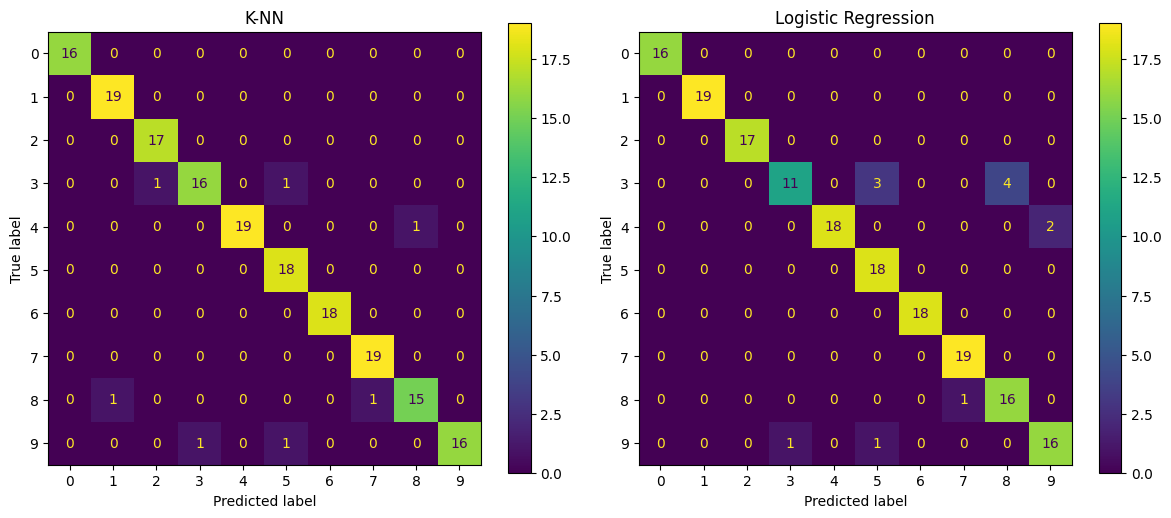

In [6]:
#Ma trận confusion matrix 
y_True = y_test
y_pred_knn = knn.predict(X_test)
y_pred_logistic = logistic.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 hàng, 2 cột

# Confusion matrix KNN
ConfusionMatrixDisplay.from_predictions(y_True, y_pred_knn, ax=axes[0])
axes[0].set_title("K-NN")

# Confusion matrix Logistic
ConfusionMatrixDisplay.from_predictions(y_True, y_pred_logistic, ax=axes[1])
axes[1].set_title("Logistic Regression")

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
#nhận dạng sai của KNN nhưng đúng với Logistic Regression
knn_wrong_logistic_correct = np.where((y_pred_knn != y_test) & (y_pred_logistic == y_test))[0]

#nhận dạng sai của Logistic Regression nhưng đúng với KNN
logistic_wrong_knn_correct = np.where((y_pred_knn == y_test) & (y_pred_logistic != y_test))[0]

#cả KNN và Logistic Regression đều nhận dạng sai
both_wrong = np.where((y_pred_knn != y_test) & (y_pred_logistic != y_test))[0]

print("Nhận dạng sai của KNN nhưng đúng với Logistic Regression:")
print(knn_wrong_logistic_correct)

print("\nNhận dạng sai của Logistic Regression nhưng đúng với KNN:")
print(logistic_wrong_knn_correct)

print("\nNhận dạng sai của cả hai mô hình:")
print(both_wrong)

Nhận dạng sai của KNN nhưng đúng với Logistic Regression:
[173]

Nhận dạng sai của Logistic Regression nhưng đúng với KNN:
[ 11  63  73 109 112 113]

Nhận dạng sai của cả hai mô hình:
[ 41  43  45  49 110 148]


Hiển thị các mẫu KNN sai nhưng Logistic đúng:


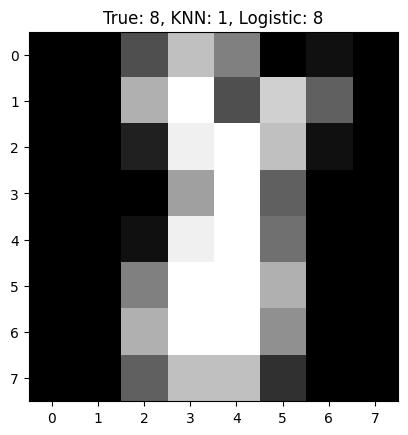

Hiển thị các mẫu Logistic sai nhưng KNN đúng:


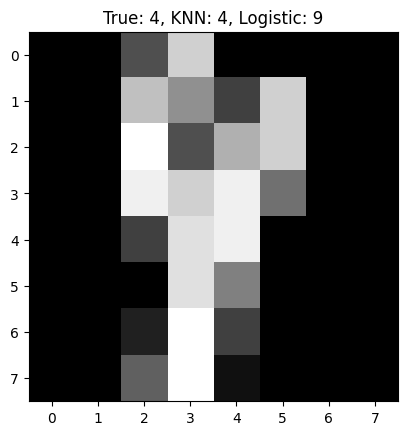

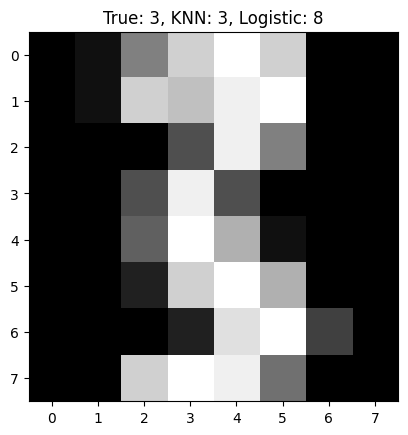

Hiển thị các mẫu cả 2 mô hình đều sai:


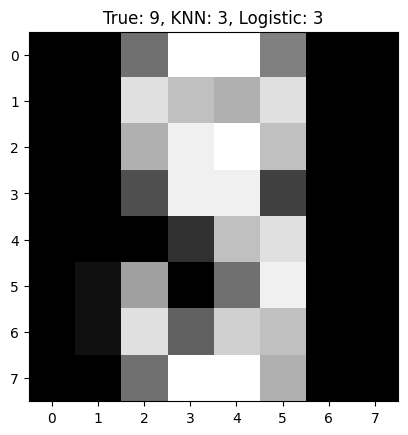

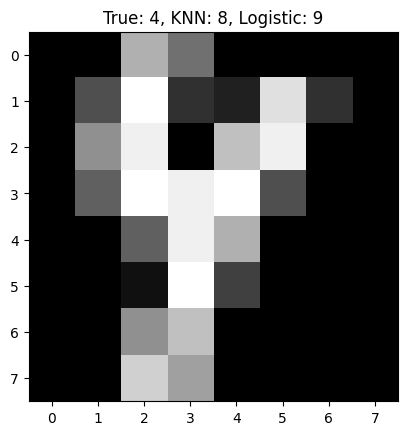

In [16]:
num_samples = 2

# Mẫu nhận dạng sai của KNN nhưng đúng với Logistic Regression
print("Hiển thị các mẫu KNN sai nhưng Logistic đúng:")
for idx in knn_wrong_logistic_correct[:num_samples]:
    plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"True: {y_test[idx]}, KNN: {y_pred_knn[idx]}, Logistic: {y_pred_logistic[idx]}")
    plt.show()

# Mẫu nhận dạng sai của Logistic Regression nhưng đúng với KNN
print("Hiển thị các mẫu Logistic sai nhưng KNN đúng:")
for idx in logistic_wrong_knn_correct[:num_samples]:
    plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"True: {y_test[idx]}, KNN: {y_pred_knn[idx]}, Logistic: {y_pred_logistic[idx]}")
    plt.show()

# Mẫu nhận dạng sai của cả hai mô hình
print("Hiển thị các mẫu cả 2 mô hình đều sai:")
for idx in both_wrong[:num_samples]:
    plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"True: {y_test[idx]}, KNN: {y_pred_knn[idx]}, Logistic: {y_pred_logistic[idx]}")
    plt.show()